<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%9F%D0%BE%D0%B4%D0%B1%D0%BE%D1%80_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8F_%D0%B4%D0%BB%D1%8F_MOEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подбор первого портфеля для MOEX

Проект "Оптимизация инвестиционного портфеля".

https://github.com/prog815/portfOptim

Енин А.В.

Оренбург - 2020

18.09.2020

Из всего множества акций отбираем наиболее приемлемые по статистическим характеристикам.

# Отбор по статистике

## Список всех тикеров

In [ ]:
ticks = """TGKA.ME
FEES.ME
VTBR.ME
TGKB.ME
HYDR.ME
TGKD.ME
TGKN.ME
IRAO.ME
RSTI.ME
ENRU.ME
OGKB.ME
SNGS.ME
SBER.ME
MRKV.ME
CBOM.ME
GAZP.ME
UPRO.ME
MRKZ.ME
ALRS.ME
TGKBP.ME
MRKP.ME
SNGSP.ME
MAGN.ME
AFKS.ME
TGKDP.ME
RUAL.ME
MSNG.ME
MRKC.ME
MRKY.ME
SBERP.ME
MRKU.ME
MOEX.ME
NMTP.ME
NLMK.ME
USBN.ME
DSKY.ME
MTLR.ME
AFLT.ME
MSRS.ME
ROSN.ME
TTLK.ME
MTSS.ME
ROLO.ME
TATN.ME
FESH.ME
TRMK.ME
RGSS.ME
RSTIP.ME
RTKM.ME
YKENP.ME
YKEN.ME
NVTK.ME
YNDX.ME
LKOH.ME
UNAC.ME
CHMF.ME
SIBN.ME
POLY.ME
SAGO.ME
AMEZ.ME
ISKJ.ME
DVEC.ME
RASP.ME
MTLRP.ME
HIMCP.ME
RUSP.ME
TATNP.ME
RTKMP.ME
CNTLP.ME
GMKN.ME
KCHEP.ME
UTAR.ME
MGNT.ME
SELG.ME
SFIN.ME
LSNG.ME
KZOSP.ME
BSPB.ME
TCSG.ME
MRKS.ME
FIVE.ME
MVID.ME
OBUV.ME
NKNCP.ME
APTK.ME
PLZL.ME
LSNGP.ME
BLNG.ME
PIKK.ME
KCHE.ME
RTSBP.ME
PHOR.ME
RUSI.ME
CNTL.ME
LSRG.ME
SELGP.ME
IRGZ.ME
ZVEZ.ME
MAGEP.ME
BISVP.ME
RTSB.ME
KZOS.ME
BANEP.ME
UWGN.ME
AQUA.ME
KRSBP.ME
KMAZ.ME
KRSB.ME
MAGE.ME
YAKG.ME
NKNC.ME
WTCMP.ME
RAVN.ME
MSTT.ME
KRKOP.ME
IRKT.ME
SVAV.ME
VRSB.ME
BELU.ME
RNFT.ME
SLEN.ME
ABRD.ME
EELT.ME
GTRK.ME
BANE.ME
ALBK.ME
CHEP.ME
MRKK.ME
RDRB.ME
PMSBP.ME
GCHE.ME
LNZLP.ME
PMSB.ME
AVAN.ME
WTCM.ME
TRNFP.ME
KUBE.ME
VZRZP.ME
KAZT.ME
JNOS.ME
NKHP.ME
GAZA.ME
BRZL.ME
JNOSP.ME
ROSB.ME
INGR.ME
NAUK.ME
KROTP.ME
UNKL.ME
AKRN.ME
KBSB.ME
GAZAP.ME
VJGZP.ME
VJGZ.ME
KRKNP.ME
KROT.ME
MGTSP.ME
KBTK.ME
VSMO.ME
LNZL.ME
KGKC.ME
KGKCP.ME
MFGSP.ME
UCSS.ME
CHMK.ME
ZILL.ME
UKUZ.ME
RKKE.ME
MFGS.ME
NNSB.ME
HALS.ME
KRKN.ME
KOGK.ME
OMZZP.ME
URKZ.ME
PAZA.ME
TNSE.ME
KAZTP.ME
ALNU.ME
NNSBP.ME
YRSB.ME
PRMB.ME
CHKZ.ME
VSYD.ME
MGTS.ME
RTGZ.ME""".split('\n')
print(ticks)

['TGKA.ME', 'FEES.ME', 'VTBR.ME', 'TGKB.ME', 'HYDR.ME', 'TGKD.ME', 'TGKN.ME', 'IRAO.ME', 'RSTI.ME', 'ENRU.ME', 'OGKB.ME', 'SNGS.ME', 'SBER.ME', 'MRKV.ME', 'CBOM.ME', 'GAZP.ME', 'UPRO.ME', 'MRKZ.ME', 'ALRS.ME', 'TGKBP.ME', 'MRKP.ME', 'SNGSP.ME', 'MAGN.ME', 'AFKS.ME', 'TGKDP.ME', 'RUAL.ME', 'MSNG.ME', 'MRKC.ME', 'MRKY.ME', 'SBERP.ME', 'MRKU.ME', 'MOEX.ME', 'NMTP.ME', 'NLMK.ME', 'USBN.ME', 'DSKY.ME', 'MTLR.ME', 'AFLT.ME', 'MSRS.ME', 'ROSN.ME', 'TTLK.ME', 'MTSS.ME', 'ROLO.ME', 'TATN.ME', 'FESH.ME', 'TRMK.ME', 'RGSS.ME', 'RSTIP.ME', 'RTKM.ME', 'YKENP.ME', 'YKEN.ME', 'NVTK.ME', 'YNDX.ME', 'LKOH.ME', 'UNAC.ME', 'CHMF.ME', 'SIBN.ME', 'POLY.ME', 'SAGO.ME', 'AMEZ.ME', 'ISKJ.ME', 'DVEC.ME', 'RASP.ME', 'MTLRP.ME', 'HIMCP.ME', 'RUSP.ME', 'TATNP.ME', 'RTKMP.ME', 'CNTLP.ME', 'GMKN.ME', 'KCHEP.ME', 'UTAR.ME', 'MGNT.ME', 'SELG.ME', 'SFIN.ME', 'LSNG.ME', 'KZOSP.ME', 'BSPB.ME', 'TCSG.ME', 'MRKS.ME', 'FIVE.ME', 'MVID.ME', 'OBUV.ME', 'NKNCP.ME', 'APTK.ME', 'PLZL.ME', 'LSNGP.ME', 'BLNG.ME', 'PIKK.ME', 'KCHE

## Подгружаем данные истории

In [4]:
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=211ad9ebc481888ea2c102a3244e2cea39931af2b51fb8c0d7fe704f017190a0
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [5]:
import yfinance as yf

In [ ]:
dscrList = []
for n in range(len(ticks)):
    tick = ticks[n]
    data = yf.download(tick,period='10y',progress=False)
    dscrList.append(data.describe())
    print(n,tick,data.shape)
    #break

0 TGKA.ME (2496, 6)
1 FEES.ME (2495, 6)
2 VTBR.ME (2495, 6)
3 TGKB.ME (2495, 6)
4 HYDR.ME (2495, 6)
5 TGKD.ME (2495, 6)
6 TGKN.ME (2495, 6)
7 IRAO.ME (2205, 6)
8 RSTI.ME (2495, 6)
9 ENRU.ME (2493, 6)
10 OGKB.ME (2205, 6)
11 SNGS.ME (2495, 6)
12 SBER.ME (2205, 6)
13 MRKV.ME (2495, 6)
14 CBOM.ME (1311, 6)
15 GAZP.ME (2495, 6)
16 UPRO.ME (2205, 6)
17 MRKZ.ME (2494, 6)
18 ALRS.ME (2199, 6)
19 TGKBP.ME (2468, 6)
20 MRKP.ME (2496, 6)
21 SNGSP.ME (2495, 6)
22 MAGN.ME (2495, 6)
23 AFKS.ME (2205, 6)
24 TGKDP.ME (2491, 6)
25 RUAL.ME (1375, 6)
26 MSNG.ME (2495, 6)
27 MRKC.ME (2496, 6)
28 MRKY.ME (2204, 6)
29 SBERP.ME (2205, 6)
30 MRKU.ME (2494, 6)
31 MOEX.ME (1902, 6)
32 NMTP.ME (2496, 6)
33 NLMK.ME (2497, 6)
34 USBN.ME (2184, 6)
35 DSKY.ME (902, 6)
36 MTLR.ME (2495, 6)
37 AFLT.ME (2495, 6)
38 MSRS.ME (2495, 6)
39 ROSN.ME (2495, 6)
40 TTLK.ME (2496, 6)
41 MTSS.ME (2205, 6)
42 ROLO.ME (1779, 6)
43 TATN.ME (2205, 6)
44 FESH.ME (2495, 6)
45 TRMK.ME (2495, 6)
46 RGSS.ME (1709, 6)
47 RSTIP.ME (2495, 6

## Отфильтровываем
С большой историей и стоимостью ниже 500 р.

In [ ]:
for n in range(len(dscrList)):
    data = dscrList[n]
    tick = ticks[n]
    cnt = int(data.Close['count'])
    vol = int(data.Volume['mean'])
    close = data.Close['mean']
    if(cnt>2490 and close<500):
        print(n,tick,cnt,vol,close)
    #break

0 TGKA.ME 2495 1791920237 0.00952540762267096
1 FEES.ME 2495 2137573615 0.17447880984905487
2 VTBR.ME 2495 21453937190 0.05737564686782852
3 TGKB.ME 2495 982982217 0.002670046100290287
4 HYDR.ME 2495 563620651 0.7738646212823406
5 TGKD.ME 2495 432868708 0.00446871543934901
6 TGKN.ME 2495 274649883 0.0027758757535271154
8 RSTI.ME 2495 229015131 1.4210638784812781
9 ENRU.ME 2493 14874130 1.2971470514024734
11 SNGS.ME 2495 24001758 30.188954575410587
13 MRKV.ME 2495 67506421 0.07207411623042906
15 GAZP.ME 2495 38041641 158.8267386121119
17 MRKZ.ME 2494 21489565 0.06230731352673785
20 MRKP.ME 2495 48322900 0.17818923445347554
21 SNGSP.ME 2495 26075317 29.479231662024
22 MAGN.ME 2495 11728494 25.871767838158924
24 TGKDP.ME 2491 52128468 0.00419698515233955
26 MSNG.ME 2495 20457808 1.8000604391814712
27 MRKC.ME 2495 17117561 0.43849567161174957
30 MRKU.ME 2494 9344517 0.15967135511804745
32 NMTP.ME 2495 2103292 4.8451799201583095
33 NLMK.ME 2495 3832041 99.38124649720584
36 MTLR.ME 2495 1572

In [ ]:
dscrList[3]

,Open,High,Low,Close,Adj Close,Volume
count,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2.495000e+03
mean,0.002667,0.002726,0.002612,0.002670,0.002670,9.829822e+08
std,0.001842,0.001876,0.001802,0.001835,0.001835,6.668290e+09
min,0.000760,0.000780,0.000490,0.000740,0.000740,0.000000e+00
25%,0.001330,0.001370,0.001300,0.001330,0.001330,5.653635e+05
50%,0.002260,0.002300,0.002230,0.002260,0.002260,1.500000e+08
75%,0.003405,0.003500,0.003310,0.003400,0.003400,4.880000e+08
max,0.009700,0.009890,0.008800,0.009000,0.009000,2.340470e+11


## Итог первичного отбора

все котировки получены
Можно использовать для анализа и отбора необходимых 

# Отбор в таблице

Отбор произведен в таблице по адресу:
https://docs.google.com/spreadsheets/d/1u4Z1fHJZGfv0HJdhIgOXGdvNaKXlwehLeWT_tEbMXoY/edit?usp=sharing

In [3]:
ticks="""TGKA.ME
VTBR.ME
HYDR.ME
TGKD.ME
MRKV.ME
MRKZ.ME
TGKDP.ME
MRKC.ME
NMTP.ME
NLMK.ME
MTLR.ME
AFLT.ME
FESH.ME
TRMK.ME
RTKM.ME
AMEZ.ME
DVEC.ME
RASP.ME
RTKMP.ME
LSNG.ME
BSPB.ME
NKNCP.ME
LSNGP.ME
KMAZ.ME
CHEP.ME
MRKK.ME
KUBE.ME
ROSB.ME""".split()
print(ticks)

['TGKA.ME', 'VTBR.ME', 'HYDR.ME', 'TGKD.ME', 'MRKV.ME', 'MRKZ.ME', 'TGKDP.ME', 'MRKC.ME', 'NMTP.ME', 'NLMK.ME', 'MTLR.ME', 'AFLT.ME', 'FESH.ME', 'TRMK.ME', 'RTKM.ME', 'AMEZ.ME', 'DVEC.ME', 'RASP.ME', 'RTKMP.ME', 'LSNG.ME', 'BSPB.ME', 'NKNCP.ME', 'LSNGP.ME', 'KMAZ.ME', 'CHEP.ME', 'MRKK.ME', 'KUBE.ME', 'ROSB.ME']


# Подгружаем библиотеку анализа портфеля

In [6]:
!pip install bt

     |████████████████████████████████| 2.7MB 2.7MB/s 
  Created wheel for bt: filename=bt-0.2.7-cp36-cp36m-linux_x86_64.whl size=533276 sha256=4f063de1dc9d0adae72842f254fce669710d1817a0831ae44fd09bbdaf856844
  Stored in directory: /root/.cache/pip/wheels/ae/8a/a2/a679757e4e7219e6f17727d1422d4ce32da847678c6559da35
  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=58b05feb004f1ad85f7b654c5b82980c8205852e975f44a463ec73e270e20a41
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built bt ffn


In [8]:
import bt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Подгружаем историю данных

In [10]:
data = bt.get(ticks, start='2010-01-01')

In [11]:
data

,tgkame,vtbrme,hydrme,tgkdme,mrkvme,mrkzme,tgkdpme,mrkcme,nmtpme,nlmkme,mtlrme,afltme,feshme,trmkme,rtkmme,amezme,dvecme,raspme,rtkmpme,lsngme,bspbme,nkncpme,lsngpme,kmazme,chepme,mrkkme,kubeme,rosbme
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-03-03,0.014108,0.056000,0.851060,0.011600,-0.396597,0.198611,0.005556,0.549784,1.890153,45.245136,682.319519,37.158562,9.40,92.702675,82.227699,12.800,0.878,161.063995,30.512236,24.167328,82.698944,1.945989,11.003892,72.700180,47.446537,120.942375,124.124344,118.975998
2010-03-04,0.014727,0.056074,0.854301,0.012100,-0.406614,0.208310,0.005732,0.550893,1.896474,44.932461,675.628540,36.956253,9.31,92.154686,82.574821,12.300,0.885,164.630859,30.243368,24.009184,83.526543,1.973754,11.007599,73.600899,47.146908,120.560188,124.208542,118.843002
2010-03-05,0.014658,0.056661,0.862079,0.012100,-0.422265,0.212023,0.005909,0.542579,1.925132,46.295177,690.834473,37.124844,9.34,93.072403,82.569145,12.648,0.898,173.246048,30.306385,24.734207,84.796074,1.946592,11.189351,74.648659,47.523190,118.936348,124.781181,117.206001
2010-03-09,0.015140,0.057456,0.874395,0.012100,-0.418821,0.208462,0.006526,0.556989,1.897739,48.063919,696.495422,36.733704,9.40,90.550316,84.099884,12.650,0.890,176.034729,31.192808,24.329523,85.478523,1.959872,11.148137,73.545746,47.453503,118.346596,125.050644,116.359001
2010-03-10,0.016035,0.057025,0.889303,0.013100,-0.409118,0.206643,0.006834,0.555326,1.959690,47.060547,687.999390,36.659519,9.28,91.580276,84.555115,12.920,0.895,173.801941,30.970146,24.613371,85.559258,1.952628,11.148137,72.415260,47.007538,118.240189,129.682144,121.832001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11,0.011500,0.035350,0.745500,0.003430,0.070000,0.048700,0.004040,0.292800,8.630000,163.479996,62.650002,82.040001,8.26,58.459999,94.709999,4.500,0.912,114.519997,86.300003,5.810000,42.820000,77.800003,150.750000,62.599998,206.500000,25.340000,74.699997,82.000000
2020-09-14,0.011600,0.035700,0.743600,0.003440,0.070100,0.049000,0.004120,0.297000,8.610000,166.559998,62.910000,82.080002,8.12,58.340000,95.410004,4.665,0.913,115.199997,86.699997,5.910000,43.000000,77.800003,150.399994,62.500000,210.000000,25.340000,74.900002,81.000000
2020-09-15,0.011640,0.036110,0.751900,0.003510,0.070000,0.049150,0.004160,0.299000,8.685000,168.800003,64.739998,82.360001,8.14,60.860001,96.239998,4.840,0.916,119.500000,87.300003,5.900000,43.299999,79.599998,152.350006,62.900002,209.500000,25.639999,75.300003,80.800003


# Карта

In [31]:
import seaborn

In [32]:
lookbackList = list(range(20,400,10))
print(lookbackList)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390]


In [33]:
testlenList = list(range(20,300,10))
print(testlenList)

[20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290]


In [34]:
dsArray = np.zeros([len(lookbackList),len(testlenList)])
dsArray.shape

(38, 28)

In [35]:
for indLB in range(len(lookbackList)):
    lookback = lookbackList[indLB]
    for indTL in range(len(testlenList)):
        testlen = testlenList[indTL]
        
        s1 = bt.Strategy('оптимальный', [bt.algos.RunEveryNPeriods(testlen,offset=lookback),
                                         bt.algos.SelectAll(),
                                         bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback)),
                                         bt.algos.Rebalance()])
        test1 = bt.Backtest(s1, data, progress_bar=False)
        res1 = bt.run(test1)

        dsArray[indLB,indTL] = res1[0].daily_sharpe
        print('Глубины: обучения = ' + str(lookback) + ', тестирования = ' + str(testlen) + '; коэф-т Шарпа %1.2f' % res1[0].daily_sharpe)

Глубины: обучения = 20, тестирования = 20; коэф-т Шарпа 0.51
Глубины: обучения = 20, тестирования = 30; коэф-т Шарпа 0.50
Глубины: обучения = 20, тестирования = 40; коэф-т Шарпа 0.69
Глубины: обучения = 20, тестирования = 50; коэф-т Шарпа 0.47
Глубины: обучения = 20, тестирования = 60; коэф-т Шарпа 0.44
Глубины: обучения = 20, тестирования = 70; коэф-т Шарпа 0.22
Глубины: обучения = 20, тестирования = 80; коэф-т Шарпа 0.65
Глубины: обучения = 20, тестирования = 90; коэф-т Шарпа 0.33
Глубины: обучения = 20, тестирования = 100; коэф-т Шарпа 0.32
Глубины: обучения = 20, тестирования = 110; коэф-т Шарпа 0.00
Глубины: обучения = 20, тестирования = 120; коэф-т Шарпа 0.24
Глубины: обучения = 20, тестирования = 130; коэф-т Шарпа 0.30
Глубины: обучения = 20, тестирования = 140; коэф-т Шарпа 0.42
Глубины: обучения = 20, тестирования = 150; коэф-т Шарпа 0.25
Глубины: обучения = 20, тестирования = 160; коэф-т Шарпа 0.42
Глубины: обучения = 20, тестирования = 170; коэф-т Шарпа 0.27
Глубины: обучени

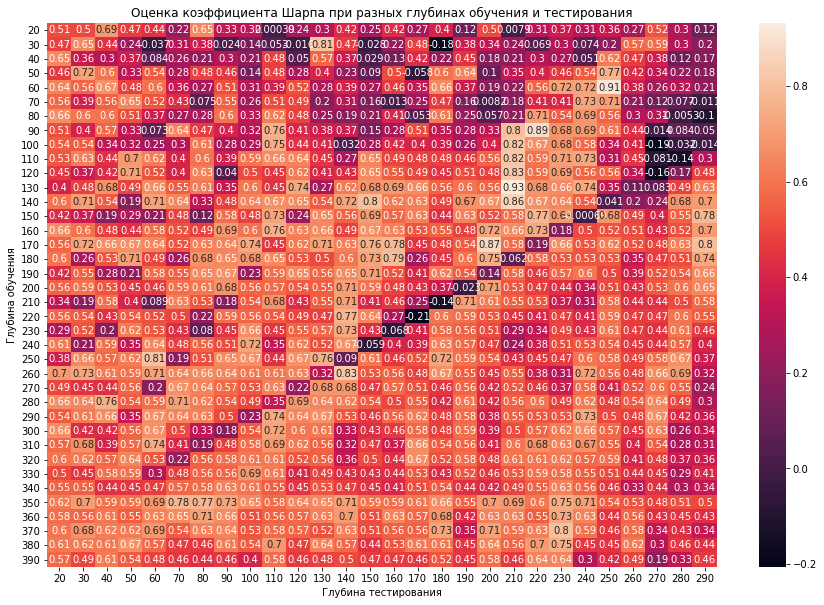

In [36]:
plt.figure(figsize=(15,10))
seaborn.heatmap(dsArray,xticklabels=testlenList,yticklabels=lookbackList,annot=True,fmt='.2g')
plt.xlabel('Глубина тестирования')
plt.ylabel('Глубина обучения')
plt.title('Оценка коэффициента Шарпа при разных глубинах обучения и тестирования')
plt.show()

## Лучшая на карте

In [37]:
lookback_best = 130
testlen_best = 210

s_best = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(testlen_best,offset=lookback_best),
                                bt.algos.SelectAll(),
                                bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback_best)),
                                bt.algos.Rebalance()])
test_best = bt.Backtest(s_best, data)
res_best = bt.run(test_best)

лучший
0% [############################# ] 100% | ETA: 00:00:00

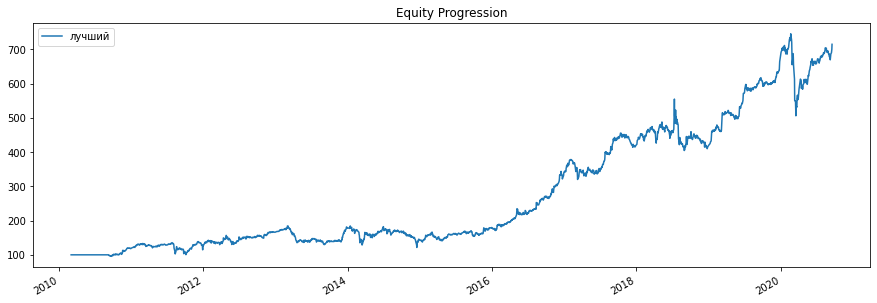

In [38]:
res_best.plot()

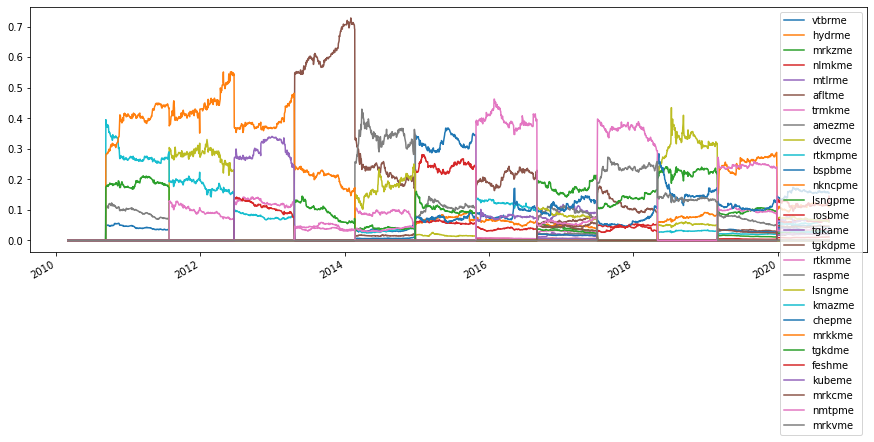

In [39]:
res_best.plot_security_weights()

In [40]:
res_best.display()

Stat                 лучший
-------------------  ----------
Start                2010-03-02
End                  2020-09-17
Risk-free rate       0.00%

Total Return         614.58%
Daily Sharpe         0.93
Daily Sortino        1.48
CAGR                 20.50%
Max Drawdown         -34.10%
Calmar Ratio         0.60

MTD                  4.14%
3m                   7.78%
6m                   35.11%
YTD                  5.84%
1Y                   16.77%
3Y (ann.)            17.72%
5Y (ann.)            33.21%
10Y (ann.)           22.23%
Since Incep. (ann.)  20.50%

Daily Sharpe         0.93
Daily Sortino        1.48
Daily Mean (ann.)    21.66%
Daily Vol (ann.)     23.25%
Daily Skew           -0.30
Daily Kurt           12.12
Best Day             11.42%
Worst Day            -14.22%

Monthly Sharpe       0.93
Monthly Sortino      1.89
Monthly Mean (ann.)  21.44%
Monthly Vol (ann.)   22.98%
Monthly Skew         0.22
Monthly Kurt         1.15
Best Month           26.60%
Worst Month          -15.

# Равномерный портфель

## Стратегия

In [12]:
s0 = bt.Strategy('равномерный', [bt.algos.RunMonthly(),
                                 bt.algos.SelectAll(),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()])
test0 = bt.Backtest(s0, data)
res0 = bt.run(test0)

равномерный
0% [############################# ] 100% | ETA: 00:00:00

## История баланса

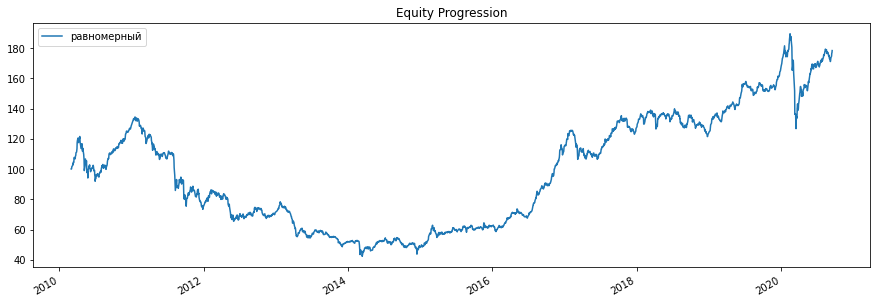

In [13]:
res0.plot()

## История распределения долей

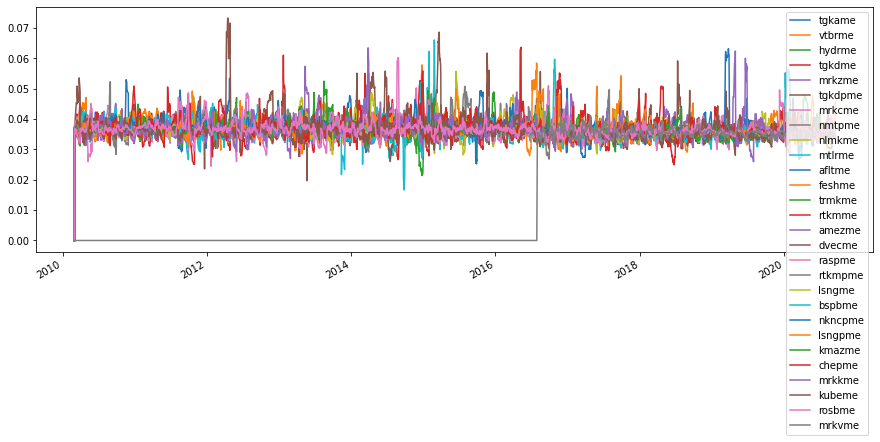

In [14]:
res0.plot_security_weights()

## Итоги по портфелю

In [15]:
res0.display()

Stat                 равномерный
-------------------  -------------
Start                2010-03-02
End                  2020-09-17
Risk-free rate       0.00%

Total Return         78.33%
Daily Sharpe         0.40
Daily Sortino        0.58
CAGR                 5.64%
Max Drawdown         -68.55%
Calmar Ratio         0.08

MTD                  2.20%
3m                   5.53%
6m                   34.88%
YTD                  8.12%
1Y                   13.96%
3Y (ann.)            11.85%
5Y (ann.)            23.31%
10Y (ann.)           4.96%
Since Incep. (ann.)  5.64%

Daily Sharpe         0.40
Daily Sortino        0.58
Daily Mean (ann.)    7.25%
Daily Vol (ann.)     18.23%
Daily Skew           -1.40
Daily Kurt           12.26
Best Day             5.77%
Worst Day            -12.54%

Monthly Sharpe       0.31
Monthly Sortino      0.53
Monthly Mean (ann.)  6.41%
Monthly Vol (ann.)   20.45%
Monthly Skew         -0.30
Monthly Kurt         0.47
Best Month           16.51%
Worst Month          -1

# Поиск параметров портфеля в генетике

## Подгружаем библиотеку генетики

In [16]:
! pip install git+https://github.com/prog815/progGA

  Cloning https://github.com/prog815/progGA to /tmp/pip-req-build-976g83fn
  Running command git clone -q https://github.com/prog815/progGA /tmp/pip-req-build-976g83fn
  Created wheel for progGA: filename=progGA-0.0.7-cp36-none-any.whl size=3627 sha256=1ee30d5124496d7089296dd0e386d9074b766316cfd4c3c9400aa3d90f31f555
  Stored in directory: /tmp/pip-ephem-wheel-cache-zju_d_ay/wheels/9c/7a/cc/d1ffa9ccaa42befda21d63d0e01c942a0add5854c37e0bd2ff
Successfully built progGA


In [17]:
from progGA import ListGenetic

## Функция расчета качества

In [18]:
qualityCache = {}

In [19]:
def getQualityMethod(lookback,testlen):
    try:
        return qualityCache[(lookback,testlen)]
    except Exception :
        pass    

    s = bt.Strategy('s', [bt.algos.RunEveryNPeriods(testlen,offset=lookback),
                          bt.algos.SelectAll(),
                          bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback)),
                          bt.algos.Rebalance()])
    test = bt.Backtest(s, data, progress_bar=False)
    res = bt.run(test)
    q = res[0].daily_sharpe
    qualityCache[(lookback,testlen)] = q

    return q

## Создаем модель

In [20]:
modelGA = ListGenetic(pop_size=100,
                      lookback=range(50,400,10),
                      testlen=range(1,300),
                      quality_method=getQualityMethod)

## Запускаем поиск

In [29]:
modelGA.fit(1000)

1541 {'quality': 0.7303329731053084, 'lookback': 360, 'testlen': 227}
1542 {'quality': 0.7933048776966298, 'lookback': 350, 'testlen': 234}
1543 {'quality': 0.6488854376575721, 'lookback': 340, 'testlen': 231}
1544 {'quality': 0.7682866464217336, 'lookback': 350, 'testlen': 229}
1545 {'quality': 0.7616288916746011, 'lookback': 350, 'testlen': 231}
1546 {'quality': 0.7616288916746011, 'lookback': 350, 'testlen': 231}
1547 {'quality': 0.7310708402671401, 'lookback': 350, 'testlen': 236}
1548 {'quality': 0.7236319528038152, 'lookback': 360, 'testlen': 229}
1549 {'quality': 0.6314627113277488, 'lookback': 340, 'testlen': 230}
1550 {'quality': 0.8265447612498161, 'lookback': 350, 'testlen': 233}
1551 {'quality': 0.8265447612498161, 'lookback': 350, 'testlen': 233}
1552 {'quality': 0.7310708402671401, 'lookback': 350, 'testlen': 236}
1553 {'quality': 0.6075525772332124, 'lookback': 340, 'testlen': 232}
1554 {'quality': 0.7616288916746011, 'lookback': 350, 'testlen': 231}
1555 {'quality': 0.8

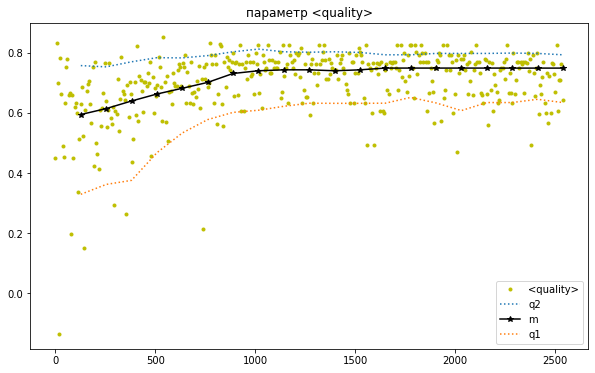

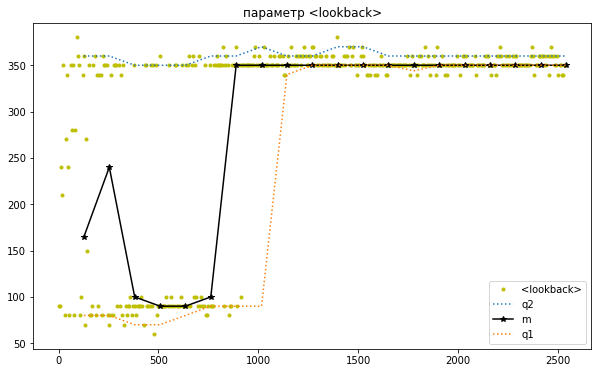

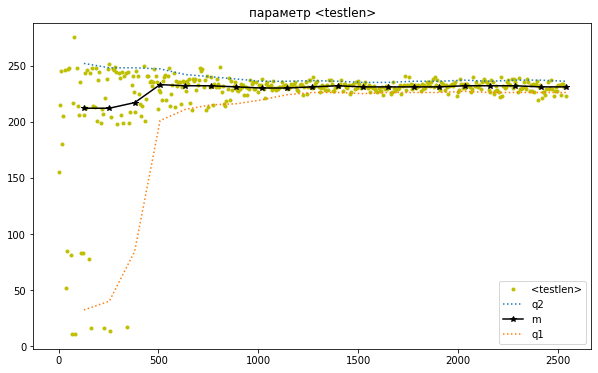

In [30]:
modelGA.plot_hist_new(('quality','lookback','testlen'))

## Лучшая на оптимизации

In [22]:
modelGA.getBestParams()

{'lookback': 340, 'testlen': 229}

In [23]:
lookback_best = 340
testlen_best = 229

s_best = bt.Strategy('лучший', [bt.algos.RunEveryNPeriods(testlen_best,offset=lookback_best),
                                bt.algos.SelectAll(),
                                bt.algos.WeighMeanVar(lookback=pd.DateOffset(days=lookback_best)),
                                bt.algos.Rebalance()])
test_best = bt.Backtest(s_best, data)
res_best = bt.run(test_best)

лучший
0% [############################# ] 100% | ETA: 00:00:00

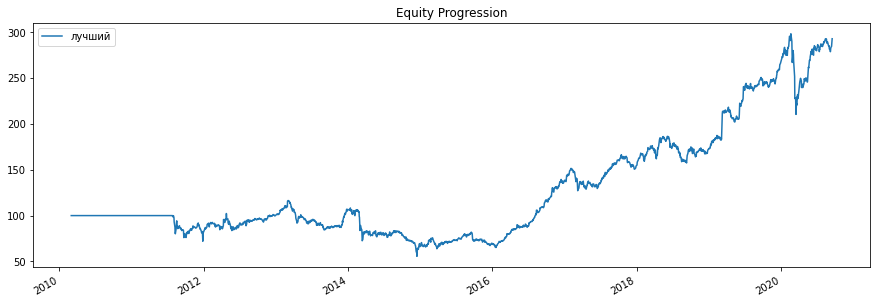

In [24]:
res_best.plot()

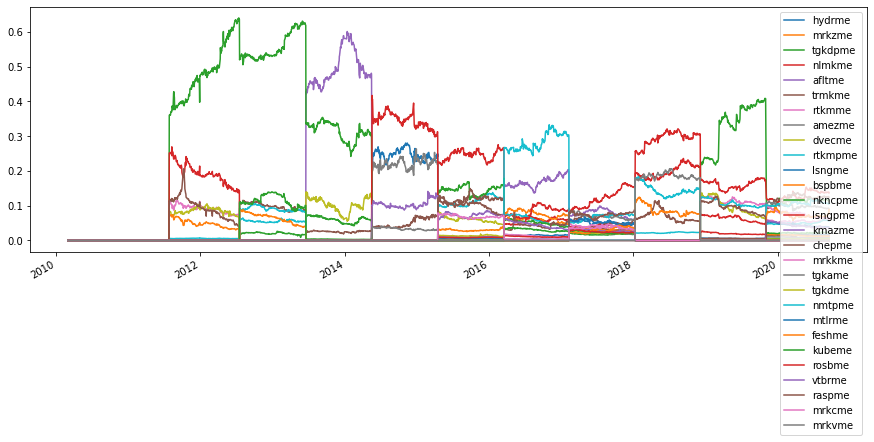

In [25]:
res_best.plot_security_weights()

In [26]:
res_best.display()

Stat                 лучший
-------------------  ----------
Start                2010-03-02
End                  2020-09-17
Risk-free rate       0.00%

Total Return         192.74%
Daily Sharpe         0.60
Daily Sortino        0.93
CAGR                 10.72%
Max Drawdown         -52.25%
Calmar Ratio         0.21

MTD                  2.88%
3m                   3.73%
6m                   33.69%
YTD                  10.19%
1Y                   18.25%
3Y (ann.)            23.05%
5Y (ann.)            28.98%
10Y (ann.)           11.34%
Since Incep. (ann.)  10.72%

Daily Sharpe         0.60
Daily Sortino        0.93
Daily Mean (ann.)    12.54%
Daily Vol (ann.)     20.93%
Daily Skew           0.03
Daily Kurt           26.89
Best Day             15.48%
Worst Day            -14.80%

Monthly Sharpe       0.60
Monthly Sortino      1.10
Monthly Mean (ann.)  12.40%
Monthly Vol (ann.)   20.78%
Monthly Skew         0.09
Monthly Kurt         0.80
Best Month           19.43%
Worst Month          -15.

# Выводы

Результаты на российском рынке значительно скромнее чем на американском. Хотя возможно это связано с большим количеством бумаг в портфеле. 

Нужно произвести оптимизацию по составу портфеля тоже. Это уже в следующем эксперименте.